In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import tensorflow_io as tfio

2025-10-05 17:53:54.878971: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-05 17:53:55.330763: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-05 17:53:57.789353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-05 17:53:57.792697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-05 17:54:07.809273: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
def load_audio(file_path):
    sample_rate = 16000
    channels = 1
    audio_binary = tf.io.read_file(file_path)
    audio, original_sample_rate = tf.audio.decode_wav(audio_binary, desired_samples=sample_rate, desired_channels=channels) # desired_samples=sample_rate,desired_channels=channels
    audio = tfio.audio.resample(audio, original_sample_rate.numpy(), sample_rate)
    waveform = tf.squeeze(audio, axis=-1)
    return waveform, sample_rate

In [3]:
def get_spectrogram(waveform):
    # Padding for files with less than 44100 samples
    zero_padding = tf.zeros([44100] - tf.shape(waveform), dtype=tf.float32)

    # Concatenate audio with padding so that all audio clips will be of the same length
    waveform = tf.cast(waveform, tf.float32)
    equal_length = tf.concat([waveform, zero_padding], 0)

    # Create spectrogram with tfio
    spect = tfio.audio.spectrogram(input=equal_length, nfft=255, window=255, stride=128)

    # Or create with tf.signal
    spectrogram = tf.signal.stft(equal_length, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)

    return spectrogram, spect

In [4]:
def plot_spectrogram(spectrogram, ax, title):
    # Convert to frequencies to log scale and transpose so that the time is
    # represented in the x-axis (columns).
    log_spec = np.log(spectrogram.T)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)
    ax.set_xlim([0, 44100])
    ax.set_title(title)

In [8]:
# TRAIN_RAW_GUNSHOT_PATH = "/content/drive/MyDrive/AZURE_AUDIO/train_raw/gunshot"
# TRAIN_GUNSHOT_PATH = "/content/drive/MyDrive/AZURE_AUDIO/train/gunshot"


# entries = os.listdir(TRAIN_RAW_GUNSHOT_PATH)

# for entry in entries:
#   load_path = os.path.join(TRAIN_RAW_GUNSHOT_PATH, entry)
#   gunshot_waveform, gunshot_sample_rate = load_audio(load_path)
#   print(tf.shape(gunshot_waveform))
#   gunshot_spectrogram, gunshot_spect = get_spectrogram(gunshot_waveform)
#   save_path = os.path.join(TRAIN_GUNSHOT_PATH, entry[:-4] + ".png")
#   plt.imsave(save_path, gunshot_spectrogram.numpy(), cmap='gray')

In [12]:
# TEST_RAW_GUNSHOT_PATH = "/content/drive/MyDrive/AZURE_AUDIO/test_raw/gunshot"
# TEST_GUNSHOT_PATH = "/content/drive/MyDrive/AZURE_AUDIO/test/gunshot"


# entries = os.listdir(TEST_RAW_GUNSHOT_PATH)

# for entry in entries:
#   print(entry)
#   load_path = os.path.join(TEST_RAW_GUNSHOT_PATH, entry)
#   gunshot_waveform, gunshot_sample_rate = load_audio(load_path)
#   print(tf.shape(gunshot_waveform))
#   gunshot_spectrogram, gunshot_spect = get_spectrogram(gunshot_waveform)
#   save_path = os.path.join(TEST_GUNSHOT_PATH, entry[:-4] + ".png")
#   plt.imsave(save_path, gunshot_spectrogram.numpy(), cmap='gray')

8 (86).wav


NotImplementedError: in user code:

    File "/home/dhekmass/anaconda3/envs/msd/lib/python3.11/site-packages/tensorflow_io/python/ops/audio_ops.py", line 465, in f
        return core_ops.io_audio_resample(
    File "/home/dhekmass/anaconda3/envs/msd/lib/python3.11/site-packages/tensorflow_io/python/ops/__init__.py", line 88, in __getattr__
        return getattr(self._load(), attrb)
    File "/home/dhekmass/anaconda3/envs/msd/lib/python3.11/site-packages/tensorflow_io/python/ops/__init__.py", line 84, in _load
        self._mod = _load_library(self._library)
    File "/home/dhekmass/anaconda3/envs/msd/lib/python3.11/site-packages/tensorflow_io/python/ops/__init__.py", line 69, in _load_library
        raise NotImplementedError(

    NotImplementedError: unable to open file: libtensorflow_io.so, from paths: ['/home/dhekmass/anaconda3/envs/msd/lib/python3.11/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
    caused by: ['/home/dhekmass/anaconda3/envs/msd/lib/python3.11/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN4absl12lts_202308028StatusOrIN3tsl4core11RefCountPtrIS1_EEEEvEE']


In [16]:
# import wave

# load_path = "non_gunshot (short).wav"

# with wave.open(load_path, "rb") as wave_file:
#   frame_rate = wave_file.getframerate()
#   print(frame_rate)
# print(load_path)

44100
non_gunshot (short).wav


In [11]:
# TRAIN_RAW_NON_GUNSHOT_PATH = "/content/drive/MyDrive/AZURE_AUDIO/train_raw/non_gunshot"
# TRAIN_NON_GUNSHOT_PATH = "/content/drive/MyDrive/AZURE_AUDIO/train/non_gunshot"

# entries = os.listdir(TRAIN_RAW_NON_GUNSHOT_PATH)

# for entry in entries:
#   print(entry)
#   load_path = os.path.join(TRAIN_RAW_NON_GUNSHOT_PATH, entry)
#   try:
#     waveform, sample_rate = load_audio(load_path)
#     print(tf.shape(waveform))
#     print(sample_rate)
#     spectrogram, spect = get_spectrogram(waveform)
#     save_path = os.path.join(TRAIN_NON_GUNSHOT_PATH, entry[:-4] + ".png")
#     plt.imsave(save_path, spectrogram.numpy(), cmap='gray')
#   except:
#     continue

In [5]:
# train_directory = '/content/drive/MyDrive/AZURE_AUDIO/train/'
train_directory = 'train/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory, labels='inferred', label_mode='int', image_size=(256, 256), seed=123,
    validation_split=0.2, subset='validation')

class_names = train_ds.class_names
print(class_names)

Found 2522 files belonging to 2 classes.
Using 504 files for validation.
['gunshot', 'non_gunshot']


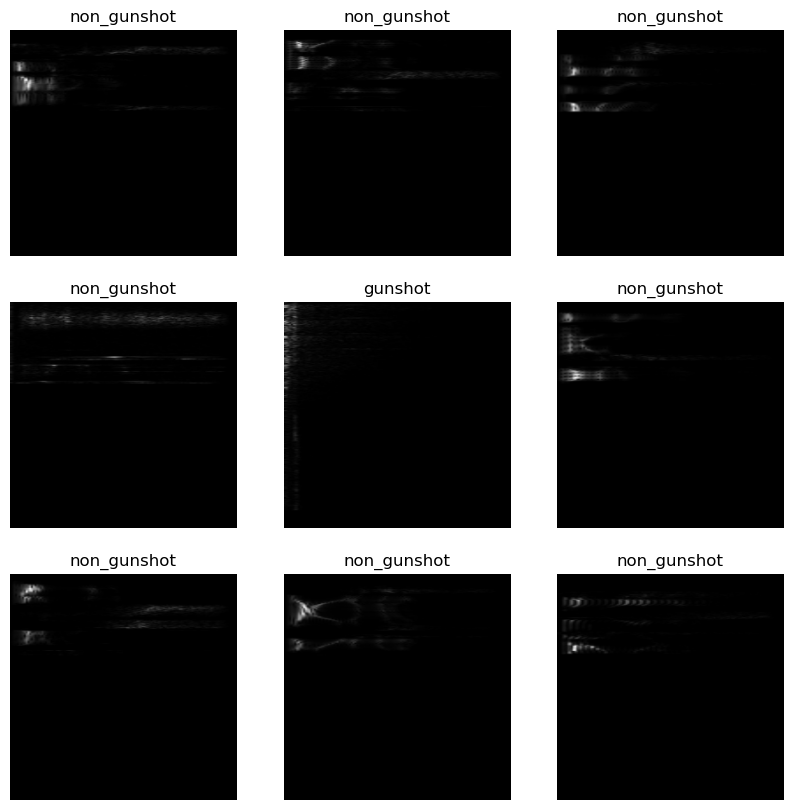

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
num_classes = 2
img_height = 256
img_width = 256

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [8]:
learning_rate = 0.125

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer, loss_fn, metrics)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [10]:
# Set the epocks
epochs = 15
print('\nFitting:')

# Train the model.
history = model.fit(train_ds, epochs=epochs)


Fitting:
Epoch 1/15
16/16 [==============================] - 7s 274ms/step - loss: 0.5328 - accuracy: 0.7044
Epoch 2/15
16/16 [==============================] - 4s 264ms/step - loss: 0.0769 - accuracy: 0.9821
Epoch 3/15
16/16 [==============================] - 4s 273ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 4/15
16/16 [==============================] - 6s 386ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/15
16/16 [==============================] - 6s 367ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/15
16/16 [==============================] - 6s 370ms/step - loss: 7.3605e-04 - accuracy: 1.0000
Epoch 7/15
16/16 [==============================] - 6s 369ms/step - loss: 5.4290e-04 - accuracy: 1.0000
Epoch 8/15
16/16 [==============================] - 6s 367ms/step - loss: 4.2687e-04 - accuracy: 1.0000
Epoch 9/15
16/16 [==============================] - 6s 370ms/step - loss: 3.4887e-04 - accuracy: 1.0000
Epoch 10/15
16/16 [==============================] - 6s 368ms/step - loss:

In [13]:
test_directory = 'test/'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, labels='inferred', label_mode='int', image_size=(256, 256), 
    validation_split=None, subset=None)

correct = 0
batch_size = 0
for batch_num, (X, Y) in enumerate(test_ds):
    batch_size = len(Y)
    pred = model.predict(X)
    for i in range(batch_size):
        predicted = np.argmax(pred[i], axis=-1)
        actual = Y[i]
        #print(f'predicted {predicted}, actual {actual}')
        if predicted == actual:
            correct += 1
    break

print(f'Number correct: {correct} out of {batch_size}')
print(f'Accuracy {correct / batch_size}')

Found 125 files belonging to 2 classes.


1/1 [==============================] - 1s 1s/step
Number correct: 32 out of 32
Accuracy 1.0


In [26]:
test_directory = 'inference/'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory, labels='inferred', label_mode='int', image_size=(256, 256), 
    validation_split=None, subset=None)

correct = 0
batch_size = 0
for batch_num, (X, Y) in enumerate(test_ds):
    batch_size = len(Y)
    pred = model.predict(X)
    for i in range(batch_size):
        # print(pred)
        predicted = np.argmax(pred[i], axis=-1)
        actual = Y[i]
        print(Y)
        #print(f'predicted {predicted}, actual {actual}')
        if predicted == actual:
            correct += 1
    break

print(f'Number correct: {correct} out of {batch_size}')
print(f'Accuracy {correct / batch_size}')

Found 6 files belonging to 2 classes.
1/1 [==============================] - 0s 52ms/step
tf.Tensor([1 1 1 0 1 1], shape=(6,), dtype=int32)
tf.Tensor([1 1 1 0 1 1], shape=(6,), dtype=int32)
tf.Tensor([1 1 1 0 1 1], shape=(6,), dtype=int32)
tf.Tensor([1 1 1 0 1 1], shape=(6,), dtype=int32)
tf.Tensor([1 1 1 0 1 1], shape=(6,), dtype=int32)
tf.Tensor([1 1 1 0 1 1], shape=(6,), dtype=int32)
Number correct: 6 out of 6
Accuracy 1.0
